In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Lets import the data
heart_df = pd.read_csv(r'C:\Users\manoj.n.d\Documents\Data Scientist work\cardio_train.csv',sep=';')
heart_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
#Shape of the heart_dataframe
heart_df.shape

(70000, 13)

In [4]:
#Lets see the null values
heart_df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
#Since no null values are found lets see the graphs
heart_df_corr = heart_df.corr()


<AxesSubplot:>

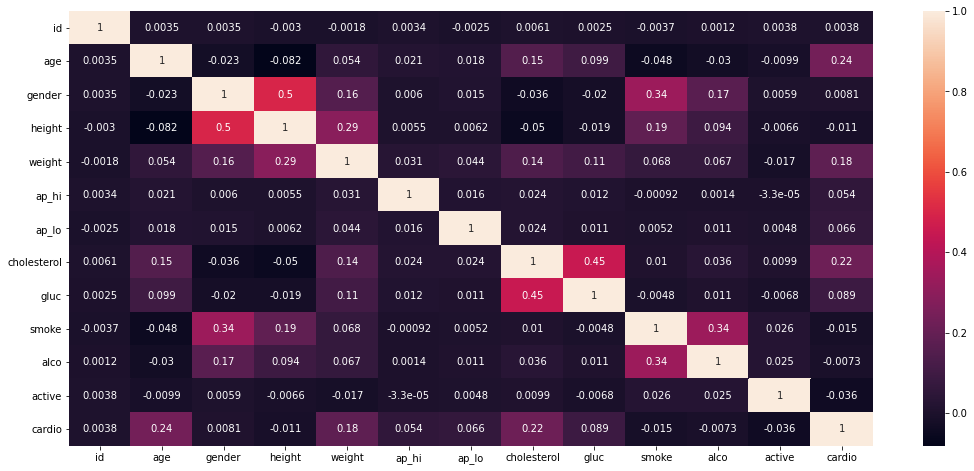

In [6]:
#Lets see in heat map the correlation 
plt.figure(figsize=(18,8))
sns.heatmap(data=heart_df_corr, annot=True)

In [7]:
#We are seeing the gender values
heart_df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [8]:
#Lets drop the id attribute since it's not important
heart_df.drop(['id'], axis=1, inplace=True)

In [9]:
#Describing the data
heart_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
heart_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
#Now we can split the data into x and y
x = heart_df.drop('cardio', axis=1) #Input feature
y=heart_df['cardio'] #Target variable
print(x.shape)
print(y.shape)

(70000, 11)
(70000,)


In [26]:
#Now lets import the machine learning models to train and spli, and evaluate our model etc...
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score

#Creating pipeline to aovoid the data loss during training
from sklearn.pipeline import make_pipeline, Pipeline

#Preprocessing
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#Ensemble technique
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, ExtraTreesClassifier,AdaBoostClassifier

#Boosting Technique
from xgboost import XGBClassifier

#Gaussian processing is based on Laplace approximation.
from sklearn.gaussian_process import GaussianProcessClassifier

#Naive Bayes
from sklearn.naive_bayes import BernoulliNB, GaussianNB

#Evoluation metrics
from sklearn.metrics import *
#With thie metrics we can use accuracy_score, classification_report, roc_curve, f1_score

In [46]:
models_list = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(),
              GradientBoostingClassifier(), ExtraTreesClassifier(), AdaBoostClassifier(), XGBClassifier(),
               BernoulliNB(),GaussianNB()]

In [36]:
#Splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=66)
print(x_train.shape)
print(x_test.shape)
print('*'*30)
print(y_train.shape)
print(y_test.shape)


(56000, 11)
(14000, 11)
******************************
(56000,)
(14000,)


In [47]:
def best_model_score(model_list, x=x_train,y=y_train):
    for mod in range(len(model_list)):
        pipe = make_pipeline((StandardScaler()),(models_list[mod]))
        fitted=pipe.fit(x,y)
        train_predict = pipe.predict(x_train)
        test_predict = pipe.predict(x_test)
        print(f'Training Accuracy of model {model_list[mod]} is {accuracy_score(y_train,train_predict)}')
        print(f'Test Accuracy of model {model_list[mod]} is {accuracy_score(y_test, test_predict)}')
        print(f'Classification f1 score of model {model_list[mod]} is{classification_report(y_test,test_predict)}')
        print('*'*30)

In [48]:
best_model_score(models_list)

Training Accuracy of model LogisticRegression() is 0.7176964285714286
Test Accuracy of model LogisticRegression() is 0.7209285714285715
Classification f1 score of model LogisticRegression() is              precision    recall  f1-score   support

           0       0.71      0.76      0.73      7109
           1       0.73      0.68      0.71      6891

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

******************************
Training Accuracy of model SVC() is 0.7324107142857142
Test Accuracy of model SVC() is 0.733
Classification f1 score of model SVC() is              precision    recall  f1-score   support

           0       0.73      0.76      0.74      7109
           1       0.74      0.70      0.72      6891

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73 

In [49]:
skfold = StratifiedKFold(n_splits=5)

In [55]:
def best_model2(models):
    for mod in range(len(models)):
        best_model = cross_val_score(estimator=models[mod],X=x,y=y,cv=skfold, n_jobs=-1,verbose=2)
        print(f'accuracy of model {models[mod]} is {np.mean(best_model)}')
        print('*'*30)

In [51]:
best_model2(models_list)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.4s remaining:   12.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Training_accuracy of model LogisticRegression() is 0.6967571428571429
******************************


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 13.7min remaining: 20.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 13.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 13.9min finished


Training_accuracy of model SVC() is 0.604
******************************


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished


Training_accuracy of model DecisionTreeClassifier() is 0.6328285714285714
******************************


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   20.6s remaining:   30.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Training_accuracy of model RandomForestClassifier() is 0.7157857142857142
******************************


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.7s remaining:   20.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Training_accuracy of model GradientBoostingClassifier() is 0.7359857142857142
******************************


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   23.8s remaining:   35.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.1s finished


Training_accuracy of model ExtraTreesClassifier() is 0.7040714285714286
******************************


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.7s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Training_accuracy of model AdaBoostClassifier() is 0.7302571428571429
******************************


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.5s remaining:   24.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Training_accuracy of model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) is 0.7337714285714286
******************************


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Training_accuracy of model BernoulliNB() is 0.5138428571428572
******************************
Training_accuracy of model GaussianNB() is 0.5924285714285714
******************************


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


0.7185170142989159


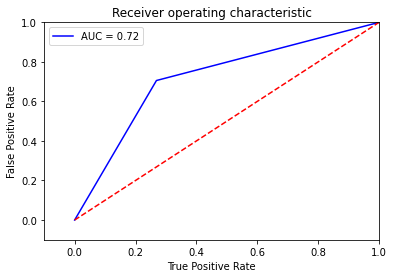

In [59]:
rcf = RandomForestClassifier()
rcf.fit(x_train,y_train)
test_prediction = rcf.predict(x_test)
fpr,tpr,thresholds = roc_curve(y_test,test_prediction)
roc_auc = auc(fpr,tpr)
print(roc_auc)
plt.title('Receiver operating characteristic')
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f'%roc_auc)
plt.legend(loc=0)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.0])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()

0.7356988742515302


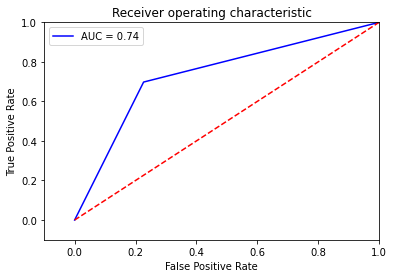

In [60]:
#This seems a good model but not soo good as gradient boosing algorithm
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
test_prediction = xgbc.predict(x_test)
fpr,tpr,thresholds = roc_curve(y_test,test_prediction)
roc_auc = auc(fpr,tpr)
print(roc_auc)
###Plot ROC
plt.title('Receiver operating characteristic')
plt.plot(fpr, tpr,'b',label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc=0)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.7373677176704825


Text(0, 0.5, 'True positive Rate')

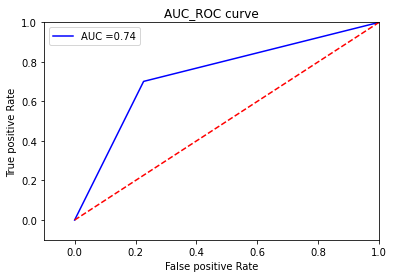

In [64]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_predict = gbc.predict(x_test)

fpr,tpr,thresholds = roc_curve(y_test,y_predict)
roc_auc = auc(fpr,tpr)
print(roc_auc)

plt.title('AUC_ROC curve')
plt.plot(fpr,tpr,'b',label='AUC =%0.2f'%roc_auc)
plt.legend(loc=0)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.0])
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')